<h1 ><center><b>Hotel Bookings Cancellation Prediction</b></center></h1>

### About The Project: 

Predicting Hotel Booking Cancellation in Portugal Project. Is a machine learning classification project that will try to predict whether a booking will be cancelled or a booking will not be cancelled using machine learning based on historical data.

### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 60)

In [4]:
import os
os.getcwd()

os.chdir('/Users/swetha/Desktop/ML Projects')

In [5]:
df = pd.read_csv('hotel_bookings.csv')

In [6]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [7]:
df.shape

(119390, 32)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Exploratory Data Analysis

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [15]:
#94% of data is missing undr company columns. hence, its ok to drop the company column. 
#Other columns has less % of missing values and can be imputed through appropriate values

## Univariate Analysis

#### Booking cancellation rate

In [16]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [17]:
rate = len(df[df['is_canceled'] == 1])/len(df) * 100
print(f'Booking Cancellation rate = {round(rate,2)} %')

Booking Cancellation rate = 37.04 %


## Analysis of each feature

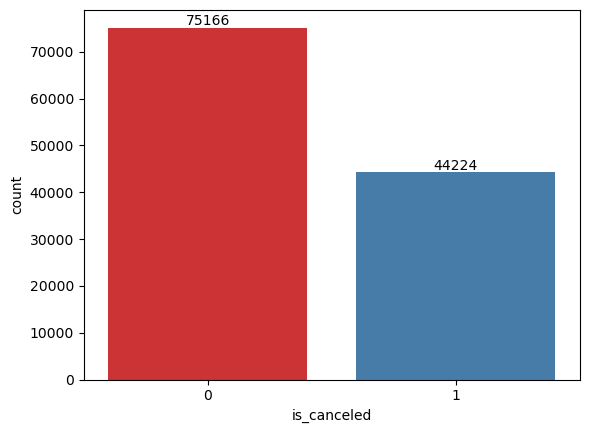

In [18]:
ax=sns.countplot(x = 'is_canceled', data = df, palette = 'Set1')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

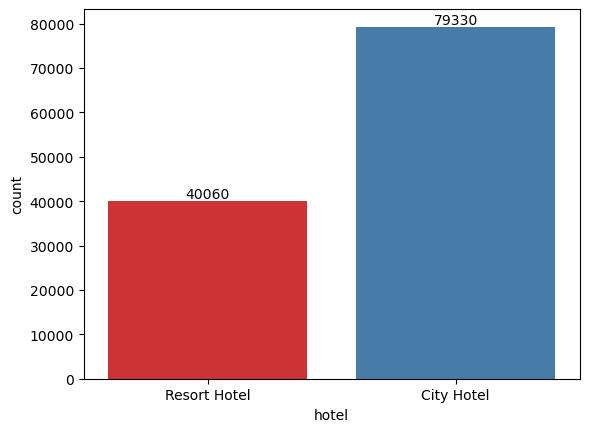

In [19]:
ax=sns.countplot(x = 'hotel', data = df, palette = 'Set1')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [20]:
# More number of bookings were made in City hotel than resort hotel

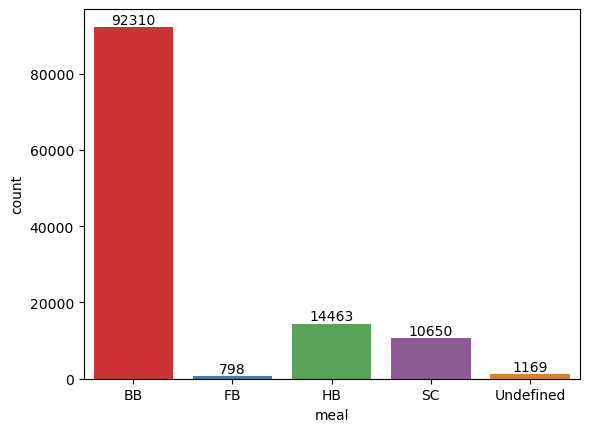

In [21]:
ax = sns.countplot(x= 'meal', data = df, palette = 'Set1')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [22]:
# Most preferred meal by customers was BB

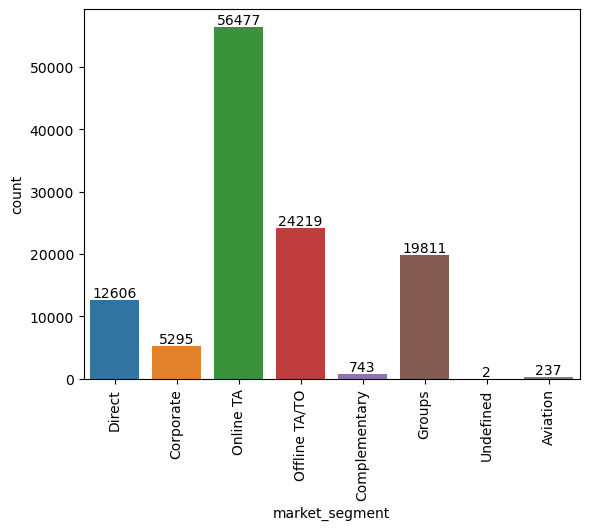

In [23]:
ax = sns.countplot(x= "market_segment", data = df)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [24]:
# maximum number of bookings were made through Online TA followed by Offline TA/TO

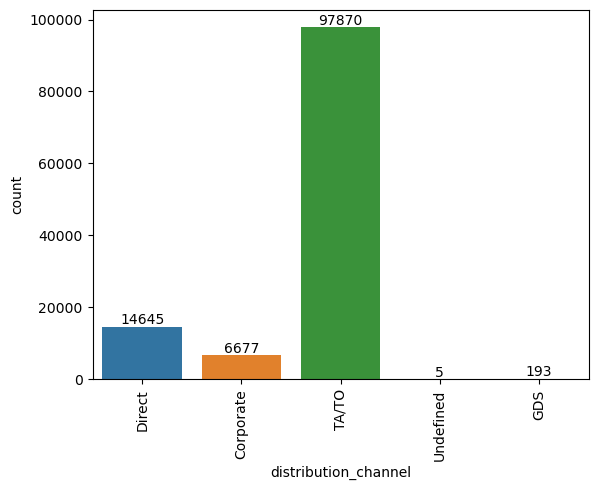

In [25]:
ax = sns.countplot(x= "distribution_channel", data = df)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

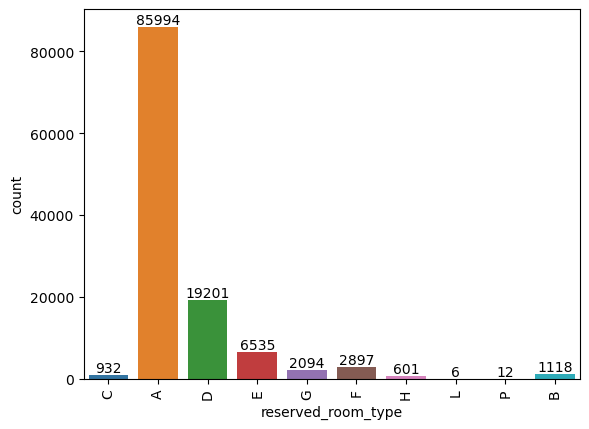

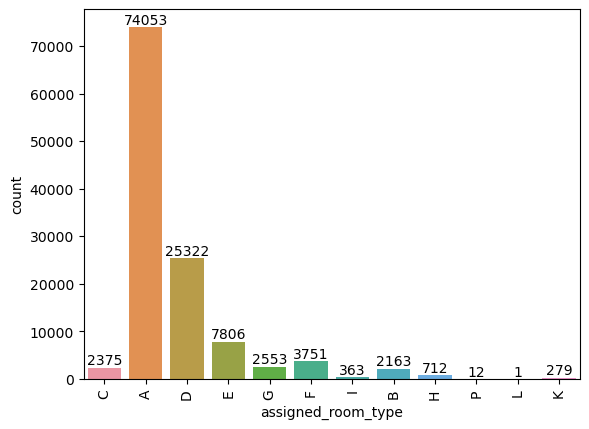

In [26]:
ax = sns.countplot(x= "reserved_room_type", data = df)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

ax = sns.countplot(x= "assigned_room_type", data = df)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()


In [27]:
# Most of the customers preferred 'A' reserved room type followed by 'D' type 
# and also more or less the same pattern has been observed while assigning the room to the customer 

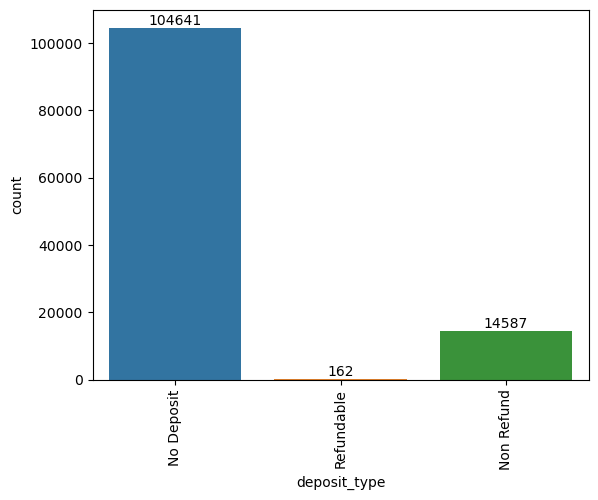

In [28]:
ax = sns.countplot(x= "deposit_type", data = df)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [29]:
# Most of the customers preferred room bookings without any deposit

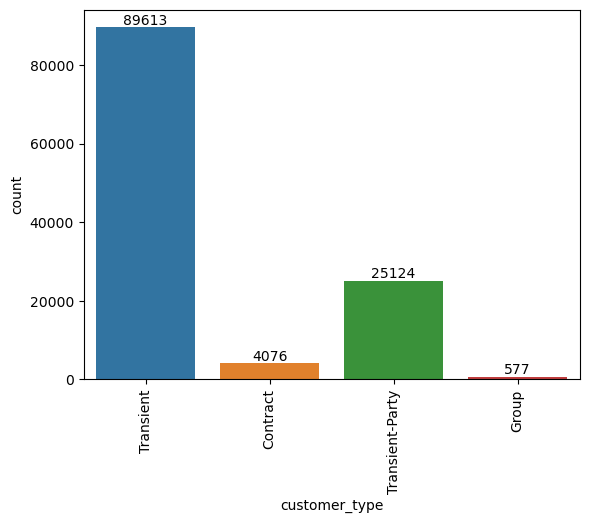

In [30]:
ax = sns.countplot(x= "customer_type", data = df)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [31]:
# Max no of bookings have been done by Transient followed by Transient-Party. 
# Less no of bookings have been done by Group & Contract

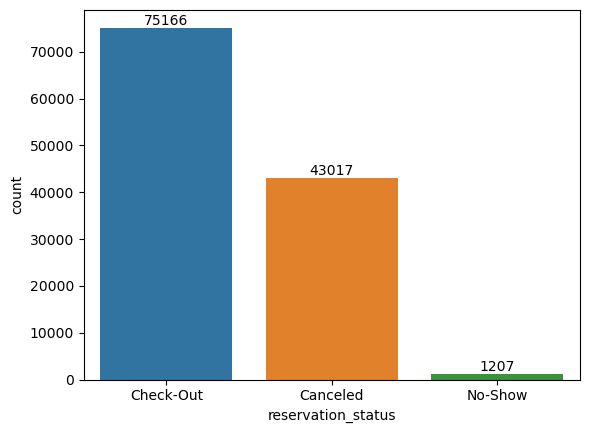

In [32]:
ax = sns.countplot(x= 'reservation_status', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [33]:
# There are only few customers who didnt show up after booking their rooms

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [35]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


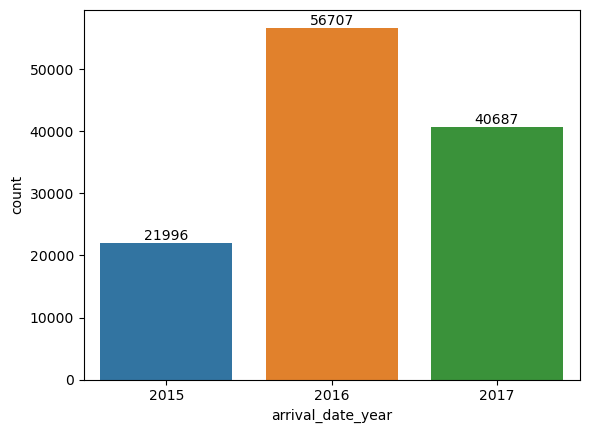

In [36]:

ax = sns.countplot(x= 'arrival_date_year', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()



In [37]:
# Most of the bookings have been made on 2016 followed by 2017

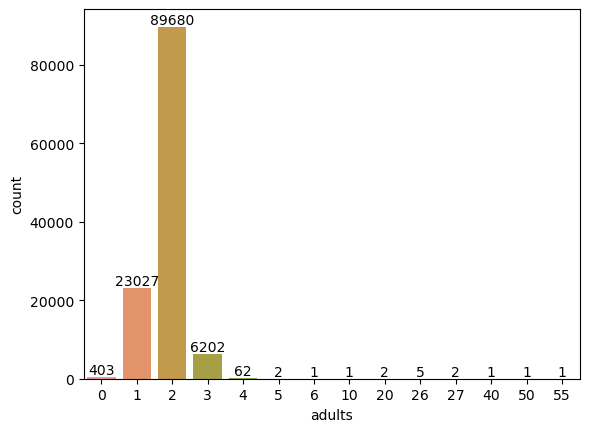

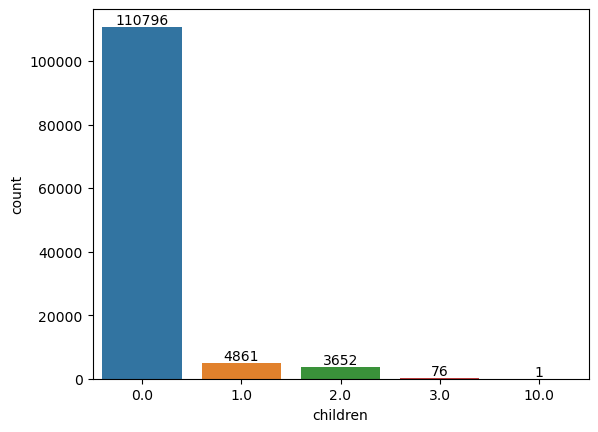

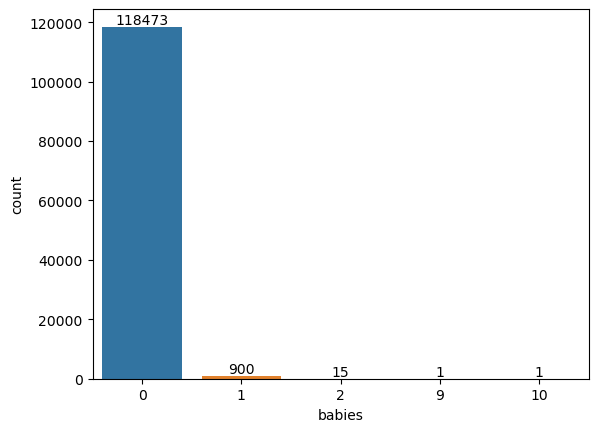

In [38]:
ax = sns.countplot(x= 'adults', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

ax = sns.countplot(x= 'children', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

ax = sns.countplot(x= 'babies', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [39]:
# Most of the bookings have been done by adults

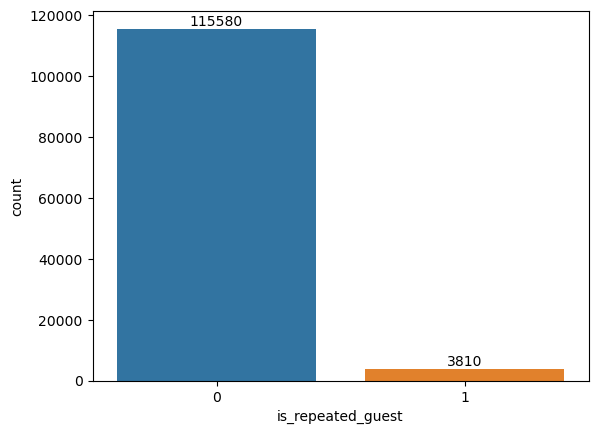

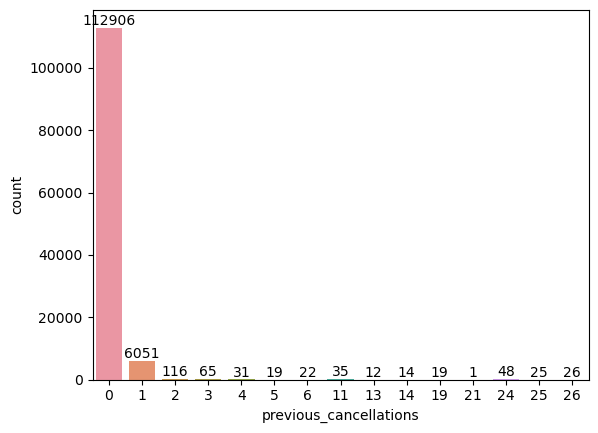

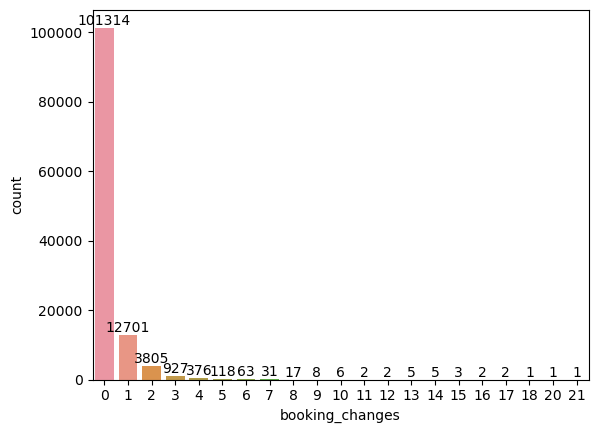

In [40]:
ax = sns.countplot(x= 'is_repeated_guest', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

ax = sns.countplot(x= 'previous_cancellations', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

ax = sns.countplot(x= 'booking_changes', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [41]:
# There were no repeated customers, only new people.
# No cancellations and booking changes has been done by customers much. 
# Only few cancellations and booking changes were made by customers.

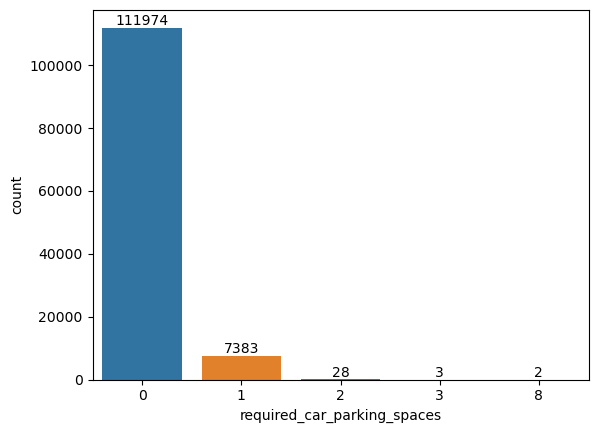

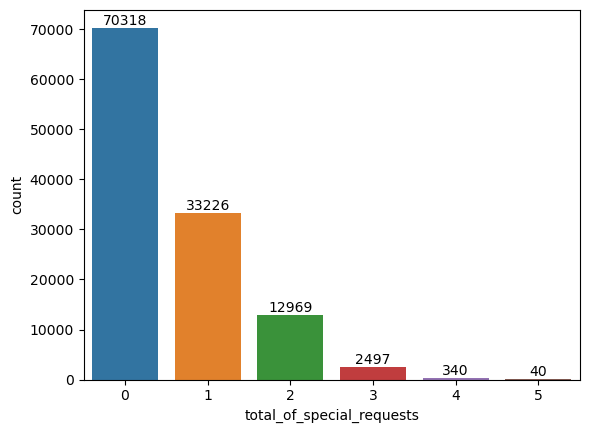

In [42]:
ax = sns.countplot(x= 'required_car_parking_spaces', data =df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

ax = sns.countplot(x= 'total_of_special_requests', data =df)

for i in ax.containers:
    ax.bar_label(i)


In [43]:
# Its been oserved that most of the customers did not require car parking space
# There were no special requests received from customers followed by only 1 & 2

## Monthly Analysis

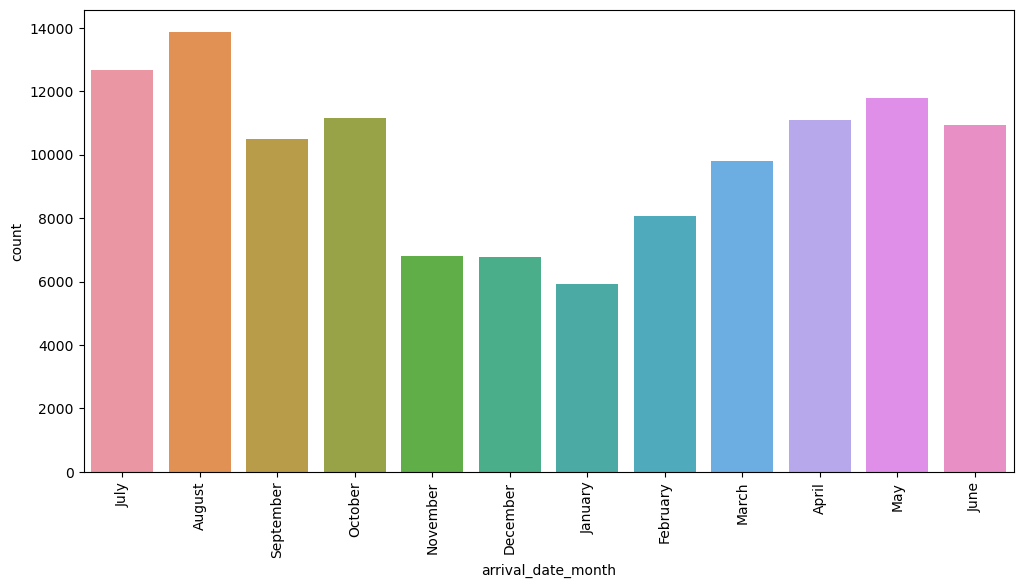

In [44]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'arrival_date_month', data =df)
plt.xticks(rotation = 90)
plt.show()

In [45]:
# Most of the bookings have been made in the month of August and April to July

## Bivariate Analysis

#### Booking Cancellation as per Hotel Type

AttributeError: 'numpy.int64' object has no attribute 'startswith'

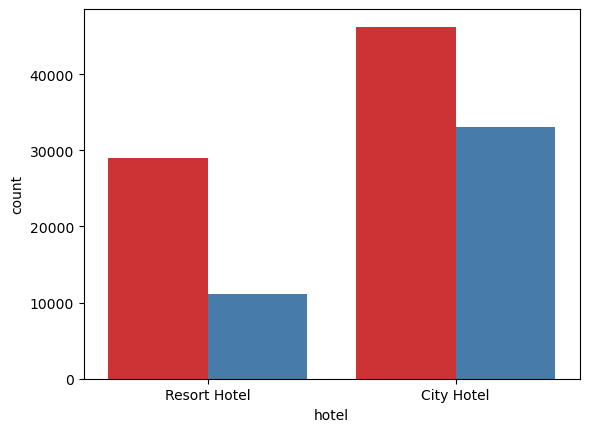

In [46]:
ax = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Set1')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [ ]:
# Most of the bookings have been made in City Hotel and so the cancellation were done there only

## Booking cancellation as per customer type

AttributeError: 'numpy.int64' object has no attribute 'startswith'

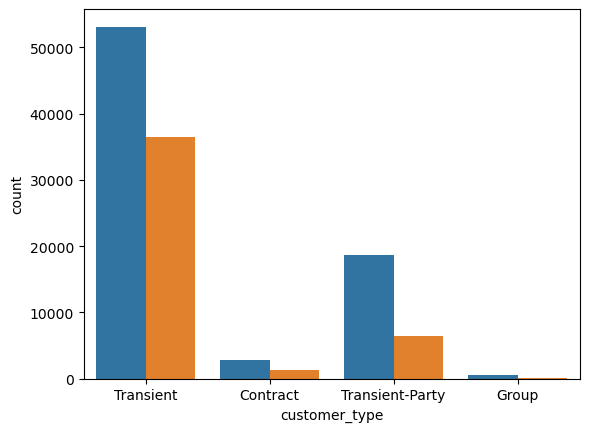

In [47]:
ax = sns.countplot(x= 'customer_type', hue = 'is_canceled', data = df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

In [ ]:
# Most of the cancellations were done by Transient followed by transient Party

### Booking cancellations as per arrival_date_year

AttributeError: 'numpy.int64' object has no attribute 'startswith'

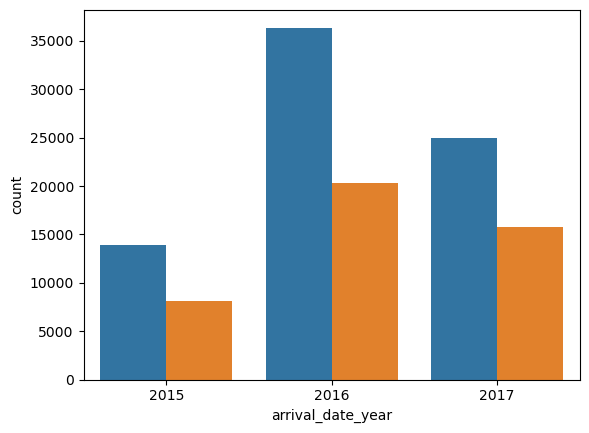

In [48]:
ax = sns.countplot(x= 'arrival_date_year', hue = 'is_canceled', data = df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

In [ ]:
# Most of he cancellation were done in the year 2016 followed by 2017

### Booking cancellation as per arrival month

AttributeError: 'numpy.int64' object has no attribute 'startswith'

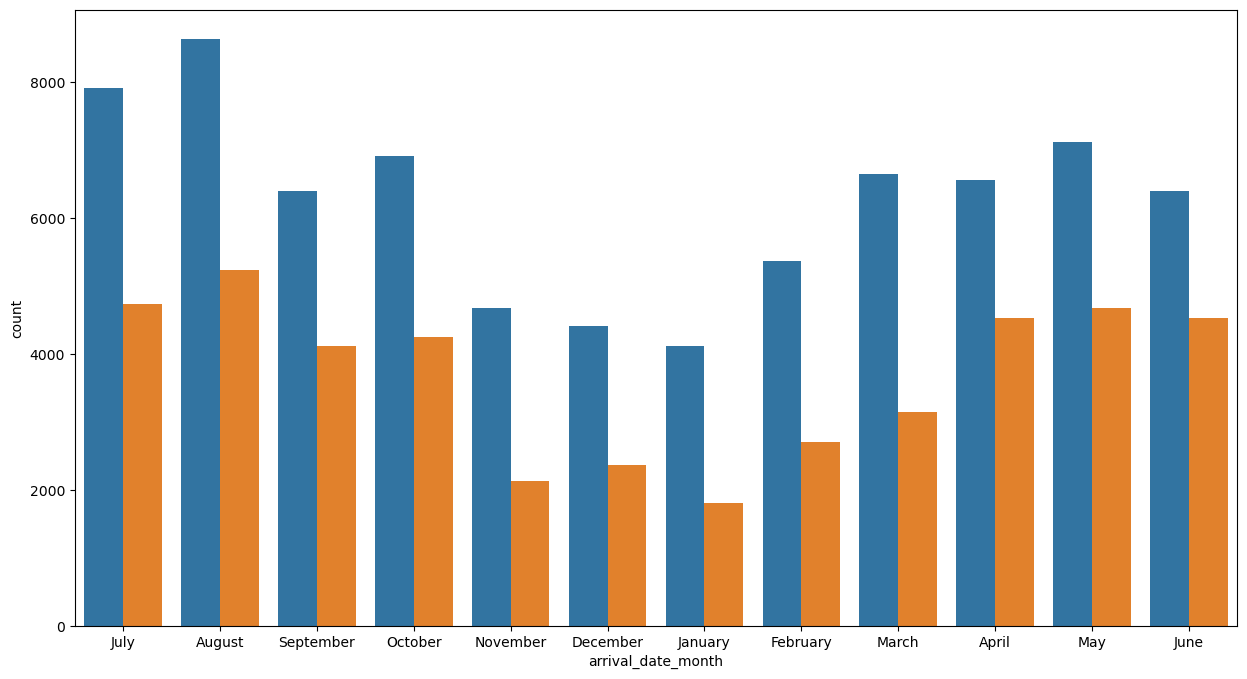

In [49]:
plt.figure(figsize= (15,8))
ax = sns.countplot(x= 'arrival_date_month', hue = 'is_canceled', data = df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

In [ ]:
# Most of the cancellations were done in the month of August followed by April to july months

### Booking cancellations as per deposit type

AttributeError: 'numpy.int64' object has no attribute 'startswith'

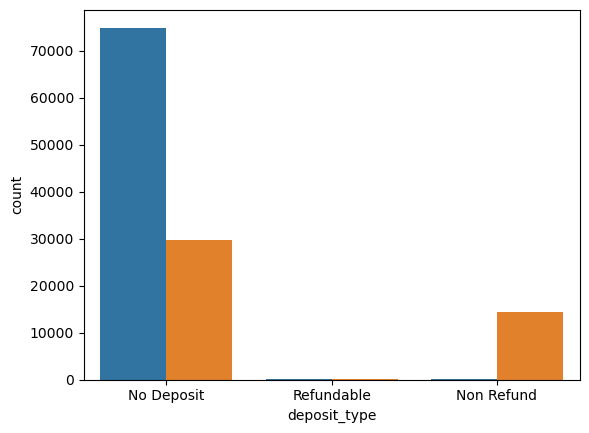

In [50]:
ax = sns.countplot(x = 'deposit_type', hue ='is_canceled', data = df)

for i in ax.containers:
    ax.bar_label(i)



In [ ]:
# Most of the cancellations were done by the customers with no deposit

### Booking cancellations as per previous cancellations

AttributeError: 'numpy.int64' object has no attribute 'startswith'

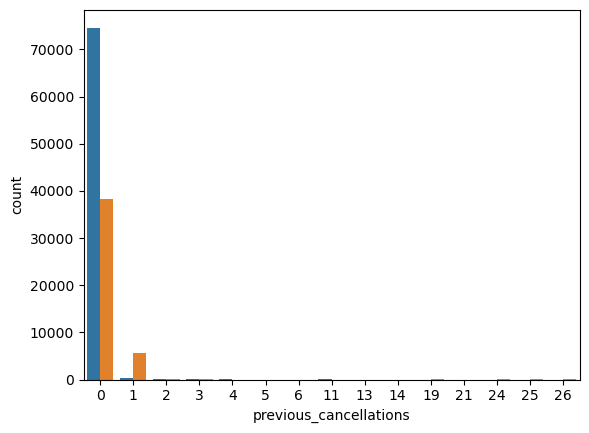

In [51]:
ax = sns.countplot(x = 'previous_cancellations', hue ='is_canceled', data = df)

for i in ax.containers:
    ax.bar_label(i)


### Booking cancellation as per is repeated guest

AttributeError: 'numpy.int64' object has no attribute 'startswith'

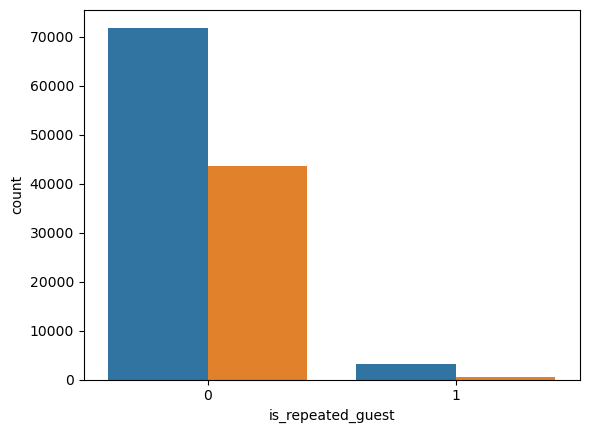

In [52]:
ax = sns.countplot(x = 'is_repeated_guest', hue ='is_canceled', data = df)

for i in ax.containers:
    ax.bar_label(i)

In [ ]:
# Most of the cancellations were done by the new guests

### Booking cancellations as per lead time

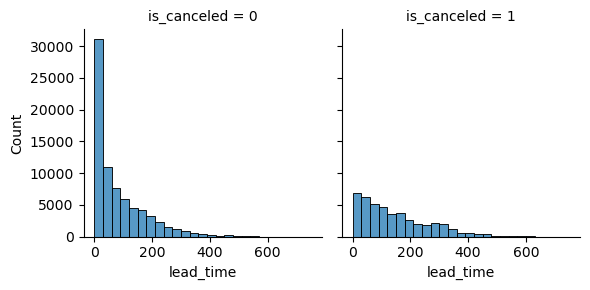

In [53]:
lt = sns.FacetGrid(df, col="is_canceled")
lt.map(sns.histplot, "lead_time", binwidth = 30)
plt.show()

In [ ]:
# lower cancellation when theres a increase in lead time

### Booking cancellations as per stays_in_weekend_nights

AttributeError: 'numpy.int64' object has no attribute 'startswith'

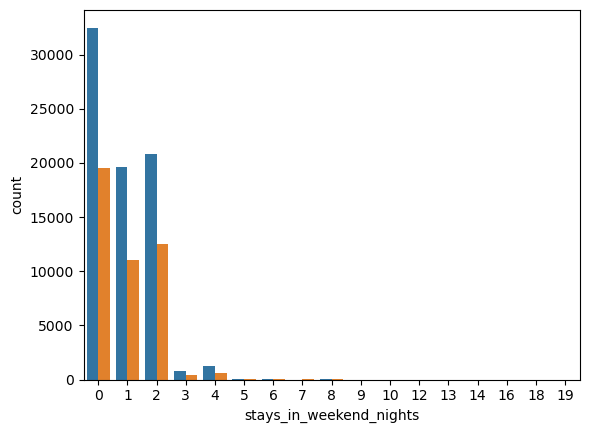

In [54]:
sns.countplot(x= 'stays_in_weekend_nights', hue = 'is_canceled', data = df)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

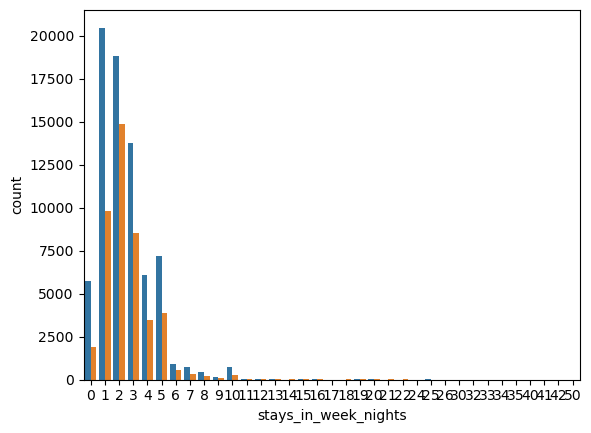

In [55]:
sns.countplot(x= 'stays_in_week_nights', hue = 'is_canceled', data = df)

In [ ]:
# More number of cancellation were observed who has opted for stays in week nights

### Booking cancellations as per country

In [56]:
df[df['is_canceled']==1]['country'].value_counts().head(10)

country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

In [ ]:
# Max cancellations have been done by PRT

### Booking cancellations as per market segment & distribution channel

AttributeError: 'numpy.int64' object has no attribute 'startswith'

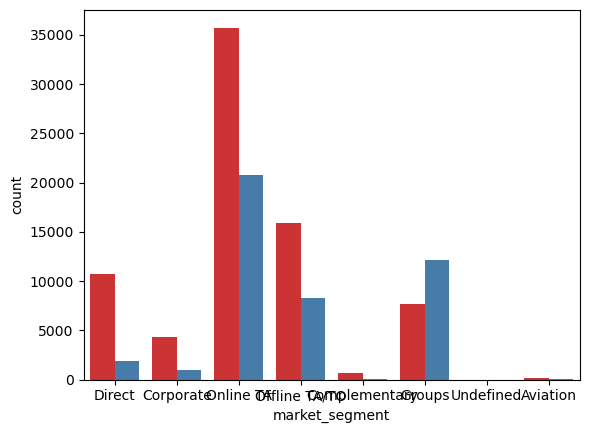

In [57]:
sns.countplot(data = df, x ="market_segment", hue = "is_canceled", palette = 'Set1')

plt.xticks(rotation = 90)
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

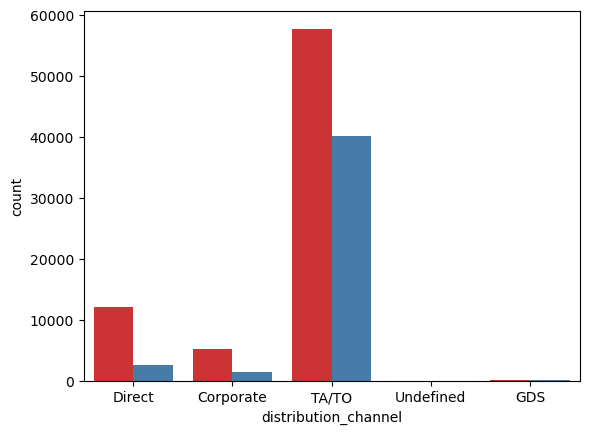

In [58]:
sns.countplot(data = df, x ="distribution_channel", hue = "is_canceled", palette = 'Set1')

In [ ]:
# Most of the cancellations have been done through TA/TO

### Booking cancelations as per reserved and assigned room type

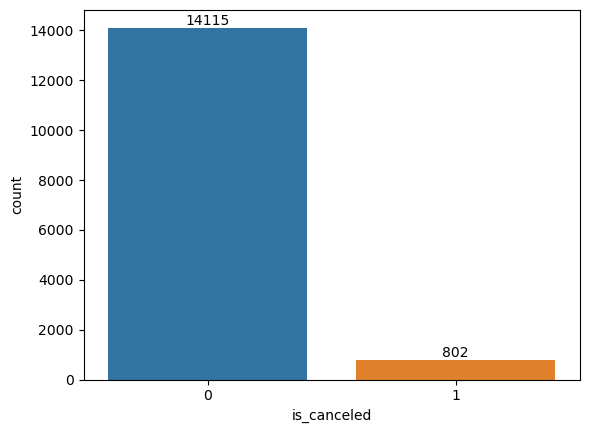

In [59]:
res_ass = df.loc[df['reserved_room_type'] != df['assigned_room_type']]

ax = sns.countplot(data = res_ass, x = "is_canceled")

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [ ]:
# there are few cancellations made by customers who have not been assigned the same room as reserved by them

## Multivariate Analysis

### Monthly analysis of avg_adr as per hotel type

In [60]:
city = df[df['hotel']== 'Resort Hotel']
resort_adr = resort.groupby(['arrival_date_month'])['adr'].mean().sort_values(ascending = False).reset_index()
resort_adr

NameError: name 'resort' is not defined

In [61]:
city = df[df['hotel']== 'City Hotel']
city_adr = city.groupby(['arrival_date_month'])['adr'].mean().sort_values(ascending = False).reset_index()
city_adr

,arrival_date_month,adr
0,May,121.638560
1,June,119.074341
2,August,114.680455
3,April,111.251838
4,July,110.734292
5,September,110.004661
6,October,99.974498
7,March,92.643116
8,December,88.826307
9,November,88.069601


In [ ]:
# In resort hotel, adr is higher in the months from June to August but peak in August, also higher than in city during those months
# In city hotel, adr is higher in the month of May


### Correlation 

In [62]:
plt.figure(figsize=(16,10),dpi=100)
sns.heatmap(df.corr(), cmap = 'coolwarm' )
plt.show()

ValueError: could not convert string to float: 'Resort Hotel'

<Figure size 1600x1000 with 0 Axes>

### Correlatin between features and booking cancellation

In [ ]:
df.corr()['is_cancelled'][:]

## Data Preprocessing

#### Treating null values

In [63]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### 1. Children column

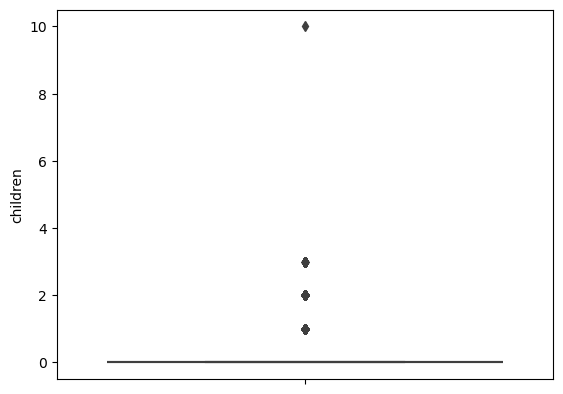

In [64]:
sns.boxplot(data = df, y='children')
plt.show()

In [65]:
# There are few outliers in this column, hence missig values can be filled by median

df['children'].fillna(df['children'].median(), inplace = True)

#### 2. Country column

In [66]:
# country column is categrical column, hence the missing valuescan be imputed by mode
df['country'].fillna(df['country'].mode()[0], inplace = True)

#### 3. Agent column

<Axes: ylabel='agent'>

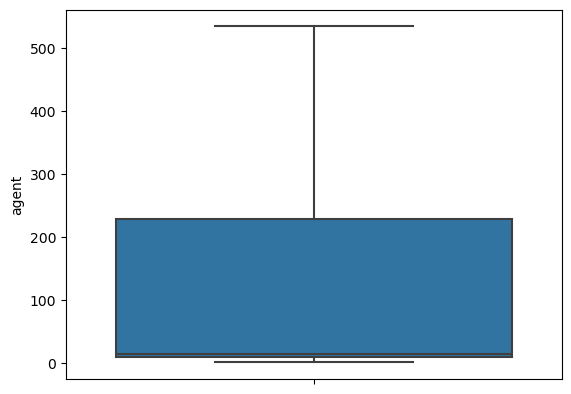

In [67]:
sns.boxplot(data = df, y='agent')

In [68]:
# There are no outliers present in the agent column. hence, missing values can be filled with mean

df['agent'].fillna(df['agent'].mean(), inplace = True)

#### 4. Company column

In [69]:
# There are almost 94% of missing values. Hence, its better to drop the feature
df.drop('company', axis =1,inplace = True)

In [70]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

##### All the null values have been treated successfully

#### Checking for duplicates


In [71]:
df.duplicated().sum()

32020

In [72]:
#need to remove duplicates.It helps to avoid biased models and improves the accuracy of the results.

df.drop_duplicates(inplace= True)

In [73]:
df.shape

(87370, 31)

### dropping undefined rows

In [74]:
undefined_rows = df[(df['market_segment'] == 'Undefined') | (df['distribution_channel'] == 'Undefined')].index

df.drop(undefined_rows, axis =0, inplace = True)

### No stay rows

In [75]:
#Bookings neither in weekend nights nor week nights is not possible

no_stays = df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0)].index
df.drop(no_stays, axis =0, inplace = True)

### Zero guests

In [76]:
# Guests cant be 0 in adults, children & babies column

Zero_guests = df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)].index
df.drop(Zero_guests, axis =0, inplace = True)

## Feature Engineering

### 1.Total Guests

In [77]:
df['Total_guest'] = df['adults'] + df['children'].astype(int) + df['babies']

### 2.Total days stay

In [78]:
df['Total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

### 3.Change in room

In [79]:
def change_in_room(row):
    if row['reserved_room_type'] == row['assigned_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(change_in_room, axis =1)

## Converting Categorical column

### 1. Arrival date month

In [80]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 
              'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df.arrival_date_month = df.arrival_date_month.map(month_dict).astype(int)

### 2. Arrival date year

In [81]:
year_dict = {2015:0, 2016:1, 2017:2}
df.arrival_date_year = df.arrival_date_year.map(year_dict).astype(int)

### 3. previous cancellations

In [82]:
is_cancel = df[(df['previous_cancellations'] > 0)]['previous_cancellations'].index
df.loc[is_cancel, 'previous_cancellations'] = 1 
df.previous_cancellations.value_counts()


previous_cancellations
0    84931
1     1677
Name: count, dtype: int64

### 4. Booking changes

In [83]:
b_changes = df[(df['booking_changes'] >0)]['booking_changes'].index
df.loc[b_changes, 'booking_changes'] = 1
df.booking_changes.value_counts()

booking_changes
0    70925
1    15683
Name: count, dtype: int64

### 5. Required Parking space

In [84]:
is_space = df[(df['required_car_parking_spaces'] >0)]['required_car_parking_spaces'].index
df.loc[is_space, 'required_car_parking_spaces'] =1
df.required_car_parking_spaces.value_counts()

required_car_parking_spaces
0    79319
1     7289
Name: count, dtype: int64

### 6. Special Requests

In [85]:
is_request = df[(df["total_of_special_requests"] > 0)]["total_of_special_requests"].index
df.loc[is_request, 'total_of_special_requests'] = 1
df.total_of_special_requests.value_counts()

total_of_special_requests
0    43415
1    43193
Name: count, dtype: int64

### 7. Country

In [86]:
df.replace({'country': {"PRT":1, "GBR":2}}, inplace = True)
other_countries = df[(df['country'] != 1) & (df['country'] != 2)]['country'].index
df.loc[other_countries, 'country'] = 0
df.country.value_counts()

country
0    48930
1    27278
2    10400
Name: count, dtype: int64

## Encoding

In [87]:
df = pd.get_dummies(data = df, columns = ['hotel', "arrival_date_year", "country", "deposit_type", "customer_type", 
                                          "market_segment", "change_in_room" ],drop_first=True, dtype=int)

In [88]:
df.head(2)

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_guest,Total_stay,hotel_Resort Hotel,arrival_date_year_1,arrival_date_year_2,country_1,country_2,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,change_in_room_True
2,0,7,7,27,1,0,1,1,0.0,0,BB,Direct,0,0,0,A,C,0,86.693382,0,75.0,0,0,Check-Out,2015-07-02,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,13,7,27,1,0,1,1,0.0,0,BB,Corporate,0,0,0,A,A,0,304.000000,0,75.0,0,0,Check-Out,2015-07-02,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


## Dropping unwanted features

In [89]:
df = df.drop(columns = ["arrival_date_week_number", "arrival_date_day_of_month","stays_in_weekend_nights",
                        "stays_in_week_nights", "adults", "children", "babies","meal","distribution_channel", 
                        "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type",
                        "days_in_waiting_list", "reservation_status", "reservation_status_date"], axis = 1)

In [90]:
df.head(2)

,is_canceled,lead_time,arrival_date_month,is_repeated_guest,previous_cancellations,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay,hotel_Resort Hotel,arrival_date_year_1,arrival_date_year_2,country_1,country_2,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,change_in_room_True
2,0,7,7,0,0,0,86.693382,75.0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,13,7,0,0,0,304.000000,75.0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [91]:
df.shape

(86608, 29)

In [92]:
df1=df.copy()

In [93]:
x = df1.drop('is_canceled', axis =1)
y = df1.is_canceled

### Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
x=pd.DataFrame(sc_x, columns = x.columns)


In [95]:
x

,lead_time,arrival_date_month,is_repeated_guest,previous_cancellations,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay,hotel_Resort Hotel,arrival_date_year_1,arrival_date_year_2,country_1,country_2,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,change_in_room_True
0,-0.851750,0.170641,-0.194117,-0.140518,-0.470235,-0.059306,-0.593481,-0.303141,-0.997440,-1.303724,-0.970014,1.256919,-0.969274,-0.756442,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,2.537320,-0.244622,-0.434348,-1.204770,2.417950
1,-0.782046,0.170641,-0.194117,-0.140518,-0.470235,2.008937,-0.593481,-0.303141,-0.997440,-1.303724,-0.970014,1.256919,-0.969274,-0.756442,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,4.460333,-0.394117,-0.244622,-0.434348,-1.204770,-0.413573
2,-0.770428,0.170641,-0.194117,-0.140518,-0.470235,1.399809,-0.170331,-0.303141,1.002567,-0.039018,-0.604509,1.256919,-0.969274,-0.756442,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573
3,-0.933071,0.170641,-0.194117,-0.140518,-0.470235,-0.059306,-0.004750,-0.303141,-0.997440,-0.039018,-0.604509,1.256919,-0.969274,-0.756442,1.474792,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,2.537320,-0.244622,-0.434348,-1.204770,-0.413573
4,-0.828515,0.170641,-0.194117,-0.140518,-0.470235,1.999419,-0.078342,-0.303141,1.002567,-0.039018,-0.604509,1.256919,-0.969274,-0.756442,1.474792,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,2.537320,-0.244622,-0.434348,-1.204770,-0.413573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86603,-0.665872,0.494037,-0.194117,-0.140518,-0.470235,2.865523,-0.204551,-0.303141,-0.997440,-0.039018,1.223017,-0.795596,-0.969274,1.321979,-0.678062,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,2.302302,-1.204770,-0.413573
86604,0.251899,0.494037,-0.194117,-0.140518,-0.470235,-0.798762,2.174104,-0.303141,1.002567,1.225688,1.223017,-0.795596,-0.969274,1.321979,-0.678062,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573
86605,-0.538081,0.494037,-0.194117,-0.140518,-0.470235,-0.798762,0.928204,-0.303141,1.002567,-0.039018,1.223017,-0.795596,-0.969274,1.321979,-0.678062,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573
86606,0.333220,0.494037,-0.194117,-0.140518,-0.470235,-0.037352,-0.052585,-0.303141,-0.997440,-0.039018,1.223017,-0.795596,-0.969274,1.321979,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573


### Splitting the train & test data

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 11)

### Model Training

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 1. Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

#prediction
y_pred = LR.predict(x_test)
y_pred_train = LR.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.82      0.91      0.87     43760
           1       0.69      0.49      0.57     16865

    accuracy                           0.80     60625
   macro avg       0.76      0.70      0.72     60625
weighted avg       0.79      0.80      0.78     60625

Fot test data
              precision    recall  f1-score   support

           0       0.82      0.91      0.87     18867
           1       0.68      0.48      0.56      7116

    accuracy                           0.79     25983
   macro avg       0.75      0.70      0.71     25983
weighted avg       0.78      0.79      0.78     25983



## 2. Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

#prediction
y_pred = DT.predict(x_test)
y_pred_train = DT.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     43760
           1       1.00      0.98      0.99     16865

    accuracy                           1.00     60625
   macro avg       1.00      0.99      0.99     60625
weighted avg       1.00      1.00      1.00     60625

Fot test data
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     18867
           1       0.63      0.63      0.63      7116

    accuracy                           0.80     25983
   macro avg       0.75      0.75      0.75     25983
weighted avg       0.80      0.80      0.80     25983



## 3. KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_test)
y_pred_train = KNN.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     43760
           1       0.79      0.73      0.76     16865

    accuracy                           0.87     60625
   macro avg       0.84      0.83      0.83     60625
weighted avg       0.87      0.87      0.87     60625

Fot test data
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     18867
           1       0.68      0.62      0.65      7116

    accuracy                           0.81     25983
   macro avg       0.77      0.75      0.76     25983
weighted avg       0.81      0.81      0.81     25983



### Finding optimal value of K

In [101]:
error_rate = []

for i in range(1,31):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    pred_i =KNN.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

print(error_rate)
    
    

[0.21021437093484202, 0.20013085478967016, 0.1927798945464342, 0.18766116306815994, 0.1850055805719124, 0.18081052996189817, 0.17992533579648232, 0.1785013277912481, 0.17653850594619558, 0.17653850594619558, 0.17573028518646808, 0.17426779047838972, 0.17507601123811722, 0.17411384366701305, 0.17526844475233808, 0.17415233036985722, 0.17472963091251972, 0.17422930377554555, 0.17503752453527308, 0.17472963091251972, 0.17538390486087058, 0.17538390486087058, 0.1752299580494939, 0.17503752453527308, 0.17526844475233808, 0.1749990378324289, 0.1754608782665589, 0.17419081707270137, 0.1758072585921564, 0.17484509102105222]


Text(0, 0.5, 'Error Rate')

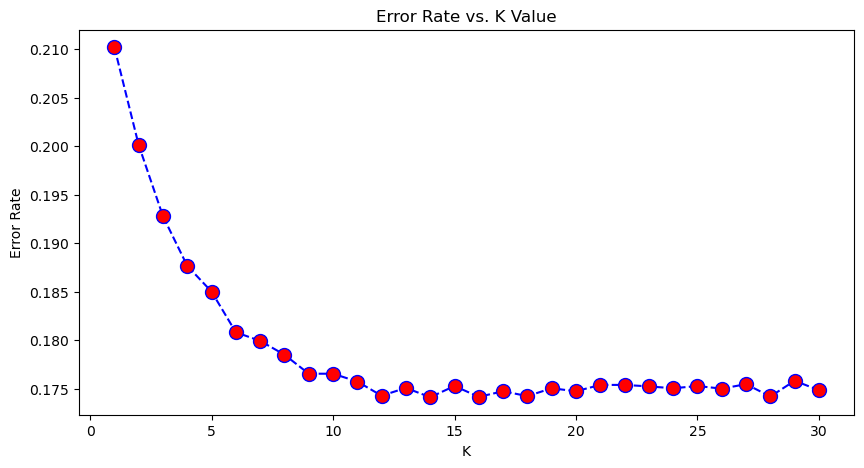

In [102]:
plt.figure(figsize=(10,5))
plt.plot(range(1,31),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [103]:
# with optimal value of K

KNN = KNeighborsClassifier(n_neighbors=16)
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_test)
y_pred_train = KNN.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))


For train data
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     43760
           1       0.77      0.61      0.68     16865

    accuracy                           0.84     60625
   macro avg       0.81      0.77      0.79     60625
weighted avg       0.83      0.84      0.83     60625

Fot test data
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     18867
           1       0.73      0.58      0.64      7116

    accuracy                           0.83     25983
   macro avg       0.79      0.75      0.76     25983
weighted avg       0.82      0.83      0.82     25983



## 4. Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

y_pred = RFC.predict(x_test)
y_pred_train = RFC.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43760
           1       0.99      0.99      0.99     16865

    accuracy                           1.00     60625
   macro avg       0.99      0.99      0.99     60625
weighted avg       1.00      1.00      1.00     60625

Fot test data
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     18867
           1       0.74      0.66      0.70      7116

    accuracy                           0.84     25983
   macro avg       0.81      0.78      0.79     25983
weighted avg       0.84      0.84      0.84     25983



### Feature importance

In [105]:
features_score = pd.Series(RFC.feature_importances_, index =x_train.columns).sort_values(ascending = False)
features_score

lead_time                        0.228129
adr                              0.158892
agent                            0.074864
arrival_date_month               0.074418
Total_stay                       0.074213
country_1                        0.059153
total_of_special_requests        0.053191
change_in_room_True              0.035845
market_segment_Online TA         0.034813
required_car_parking_spaces      0.033199
Total_guest                      0.028466
deposit_type_Non Refund          0.016473
booking_changes                  0.016179
arrival_date_year_1              0.015128
previous_cancellations           0.014485
customer_type_Transient          0.014040
arrival_date_year_2              0.013540
hotel_Resort Hotel               0.010268
market_segment_Offline TA/TO     0.010036
customer_type_Transient-Party    0.008784
country_2                        0.008764
market_segment_Direct            0.006082
is_repeated_guest                0.003924
market_segment_Groups            0

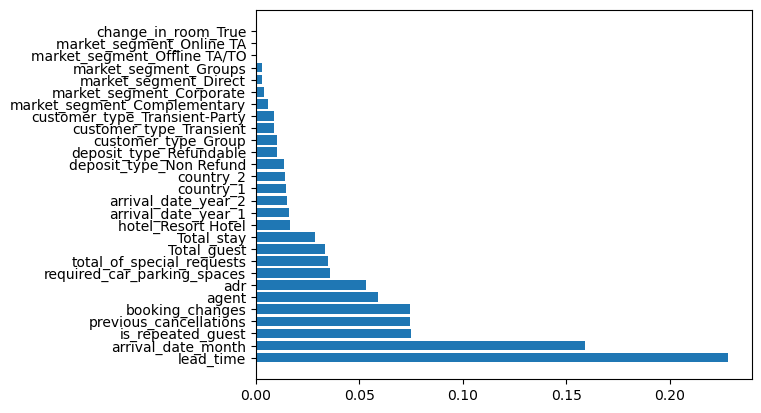

In [106]:
plt.barh(x_train.columns, features_score)
plt.show()

## 5. SVM

In [107]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_pred_test = svm.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43760
           1       0.99      0.99      0.99     16865

    accuracy                           1.00     60625
   macro avg       0.99      0.99      0.99     60625
weighted avg       1.00      1.00      1.00     60625

Fot test data
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     18867
           1       0.73      0.58      0.65      7116

    accuracy                           0.83     25983
   macro avg       0.79      0.75      0.77     25983
weighted avg       0.82      0.83      0.82     25983



## 6. Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
y_pred_train = gnb.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.95      0.35      0.51     43760
           1       0.36      0.95      0.52     16865

    accuracy                           0.52     60625
   macro avg       0.66      0.65      0.52     60625
weighted avg       0.79      0.52      0.51     60625

Fot test data
              precision    recall  f1-score   support

           0       0.95      0.35      0.51     18867
           1       0.36      0.95      0.52      7116

    accuracy                           0.52     25983
   macro avg       0.65      0.65      0.52     25983
weighted avg       0.79      0.52      0.51     25983



## 7. Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier()
gdb.fit(x_train, y_train)

y_pred = gdb.predict(x_test)
y_pred_train = gdb.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     43760
           1       0.75      0.61      0.67     16865

    accuracy                           0.83     60625
   macro avg       0.80      0.76      0.78     60625
weighted avg       0.83      0.83      0.83     60625

Fot test data
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     18867
           1       0.74      0.59      0.66      7116

    accuracy                           0.83     25983
   macro avg       0.80      0.76      0.77     25983
weighted avg       0.83      0.83      0.83     25983



## 8. AdaBoost

In [110]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

y_pred = adb.predict(x_test)
y_pred_train = adb.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.84      0.91      0.88     43760
           1       0.71      0.55      0.62     16865

    accuracy                           0.81     60625
   macro avg       0.78      0.73      0.75     60625
weighted avg       0.81      0.81      0.81     60625

Fot test data
              precision    recall  f1-score   support

           0       0.84      0.91      0.88     18867
           1       0.70      0.54      0.61      7116

    accuracy                           0.81     25983
   macro avg       0.77      0.73      0.74     25983
weighted avg       0.80      0.81      0.80     25983



## 9.Ridge Classifier

In [111]:
from sklearn.linear_model import RidgeClassifier

RC = RidgeClassifier()

RC.fit(x_train, y_train)

y_pred = RC.predict(x_test)
y_pred_train = RC.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     43760
           1       0.72      0.39      0.51     16865

    accuracy                           0.79     60625
   macro avg       0.76      0.67      0.69     60625
weighted avg       0.78      0.79      0.76     60625

Fot test data
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     18867
           1       0.71      0.38      0.49      7116

    accuracy                           0.79     25983
   macro avg       0.76      0.66      0.68     25983
weighted avg       0.78      0.79      0.76     25983



## 10. XgBoost

In [112]:
import sys
!{sys.executable} -m pip install xgboost

In [113]:

import xgboost 
from xgboost import XGBClassifier

xgb= XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)
y_pred_train = xgb.predict(x_train)

#results
print("For train data")
print(classification_report(y_train,y_pred_train))
print("Fot test data")
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     43760
           1       0.80      0.72      0.76     16865

    accuracy                           0.87     60625
   macro avg       0.85      0.83      0.84     60625
weighted avg       0.87      0.87      0.87     60625

Fot test data
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18867
           1       0.75      0.67      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.81      0.79      0.80     25983
weighted avg       0.84      0.85      0.85     25983



## Cross Validation on each Model

In [114]:
from sklearn.model_selection import cross_val_score, GridSearchCV


In [115]:
# function to find out the mean of CV score

def cv(model):
    scores = cross_val_score(model, x_train, y_train, cv =10)

    return scores.mean()

In [116]:
# 1. Logistic Regression

logreg = LogisticRegression(random_state=11).fit(x_train, y_train)
cv(logreg)


0.7958927821168177

In [117]:
# 2. Decision Tree

DT = DecisionTreeClassifier(random_state=11).fit(x_train, y_train)
cv(DT)

0.7967009302358231

In [118]:
#3. KNN

KNN = KNeighborsClassifier().fit(x_train, y_train)
cv(KNN)

0.8129812733373155

In [119]:
# KNN with optimal n value

KNN = KNeighborsClassifier(n_neighbors =16).fit(x_train, y_train)
cv(KNN)

0.821311228798376

In [120]:
# 4. Random Forest

RFC = RandomForestClassifier().fit(x_train, y_train)
cv(RFC)

0.842226665650176

In [121]:
# 5. SVM

#svm = SVC().fit(x_train, y_train)
#cv(svm)

In [122]:
#6. Naive Bayes


gnb = GaussianNB().fit(x_train, y_train)
cv(gnb)

0.517459551101861

In [123]:
#7. Gradient Boosting

gdb = GradientBoostingClassifier().fit(x_train, y_train)
cv(gdb)

0.8330062470095015

In [124]:
# 8. AdaBoost

adb = AdaBoostClassifier().fit(x_train, y_train)
cv(adb)

0.813344363997666

In [125]:
# 9. Ridge Classifier

rc = RidgeClassifier().fit(x_train, y_train)
cv(rc)

0.7874804082047768

In [126]:
# 10. XGBoost

xgb = XGBClassifier().fit(x_train, y_train)
cv(xgb)

0.8473732968680935

In [127]:
## Best performing models are 
#1. Random Forest
#2. XGBoost
#3. Gradient Boosting


## Hyper parameter Tuning on best performance models

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
# Function to find out best parameters using Grid Search CV


def classifier(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring = "accuracy")
    grid_search.fit(x_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    

In [130]:
# Testing hyperparameters

param_grid = {'max_depth' : [30,50,80], 'criterion' : ['gini', 'entropy'], 'max_leaf_nodes' :[500,1000,1200],
              'min_samples_split' : [8,10,12,24,20], 'max_features' :['sqrt', 'log2']}

rf = RandomForestClassifier()
classifier(rf, param_grid)


KeyboardInterrupt: 

In [131]:

param_grid = {'max_depth' : [30,50,80], 'criterion' : ['gini', 'entropy'], 'max_leaf_nodes' :[500,1000,1200],
              'min_samples_split' : [8,10,12,24,20], 'max_features' :['sqrt', 'log2']}

param_grid

{'max_depth': [30, 50, 80],
 'criterion': ['gini', 'entropy'],
 'max_leaf_nodes': [500, 1000, 1200],
 'min_samples_split': [8, 10, 12, 24, 20],
 'max_features': ['sqrt', 'log2']}

In [153]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=10, scoring = "accuracy")


In [154]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11],
                         'min_samples_split': [120, 140, 160, 200],
                         'n_estimators': range(150, 161, 20)},
             scoring='accuracy')

In [155]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 11, 'min_samples_split': 140, 'n_estimators': 150}
Best score: 0.831389716782755


In [156]:
from sklearn.metrics import precision_score, recall_score

In [157]:
rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 80, max_features= 'sqrt', max_leaf_nodes= 1200, min_samples_split= 20)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)

#results
print("For train data")
print(classification_report(y_train, y_pred_train))
print("For test data")
print(classification_report(y_test, y_pred))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For train data
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     43760
           1       0.81      0.69      0.75     16865

    accuracy                           0.87     60625
   macro avg       0.85      0.81      0.83     60625
weighted avg       0.87      0.87      0.87     60625

For test data
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     18867
           1       0.76      0.63      0.69      7116

    accuracy                           0.85     25983
   macro avg       0.82      0.78      0.79     25983
weighted avg       0.84      0.85      0.84     25983

Training accuracy = 0.8693278350515464
Testing accuracy = 0.8451295077550707
Testing precision = 0.7609723160027009
Testing recall = 0.6335019673974143


## 2. XGBoost

In [158]:
# testing hyper parameters

param_grid = {'gamma':[i/10.0 for i in range(10,20,1)],'min_child_weight': [7],'max_depth' : [11]}

xgb = XGBClassifier()
classifier(xgb, param_grid)


Best parameters: {'gamma': 1.0, 'max_depth': 11, 'min_child_weight': 7}
Best score: 0.8481154928131993


In [159]:
from xgboost import XGBClassifier

xgb = XGBClassifier(gamma= 1.0, max_depth= 11, min_child_weight= 7)
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
y_pred_train = xgb.predict(x_train)

#results
print("For train data")
print(classification_report(y_train, y_pred_train))
print("For test data")
print(classification_report(y_test, y_pred))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For train data
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     43760
           1       0.79      0.72      0.75     16865

    accuracy                           0.87     60625
   macro avg       0.84      0.82      0.83     60625
weighted avg       0.87      0.87      0.87     60625

For test data
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18867
           1       0.75      0.67      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.81      0.79      0.80     25983
weighted avg       0.84      0.85      0.84     25983

Training accuracy = 0.8679257731958763
Testing accuracy = 0.847284763114344
Testing precision = 0.7467858262778301
Testing recall = 0.6693367060146149


## 3. Gradient boosting

In [160]:
param_grid = {'n_estimators' : range(150, 161,20), 'max_depth' : [9,10,11], 
              'min_samples_split' : [120,140,160,200]}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 10, 'min_samples_split': 160, 'n_estimators': 150}
Best score: 0.8505401983669436


In [163]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier(max_depth = 10, min_samples_split= 160, n_estimators= 150)
gdb.fit(x_train, y_train)

y_pred = gdb.predict(x_test)
y_pred_train = gdb.predict(x_train)

#results
print("For train data")
print(classification_report(y_train, y_pred_train))
print("For test data")
print(classification_report(y_test, y_pred))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')


For train data
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     43760
           1       0.83      0.76      0.79     16865

    accuracy                           0.89     60625
   macro avg       0.87      0.85      0.86     60625
weighted avg       0.89      0.89      0.89     60625

For test data
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18867
           1       0.75      0.68      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.81      0.80      0.80     25983
weighted avg       0.84      0.85      0.85     25983

Training accuracy = 0.8887092783505155
Testing accuracy = 0.8482854173882923
Testing precision = 0.7452101359703337
Testing recall = 0.6777684092186622


## Performance Comparision

In [164]:
from tabulate import tabulate

In [168]:
table = [['Model_Name', 'Training_accuracy', 'Testing_accuracy', 'Testing_precision', 'Testing_Recall'],
         ['Random Forest', '0.869', '0.845', '0.760','0.633'],
         ['XGBoost', '0.867', '0.847','0.746', '0.669'],
         ['Gradient Boosting', '0.888', '0.848', '0.745','0.677']]

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════════════════╤═════════════════════╤════════════════════╤═════════════════════╤══════════════════╕
│ Model_Name        │   Training_accuracy │   Testing_accuracy │   Testing_precision │   Testing_Recall │
╞═══════════════════╪═════════════════════╪════════════════════╪═════════════════════╪══════════════════╡
│ Random Forest     │               0.869 │              0.845 │               0.76  │            0.633 │
├───────────────────┼─────────────────────┼────────────────────┼─────────────────────┼──────────────────┤
│ XGBoost           │               0.867 │              0.847 │               0.746 │            0.669 │
├───────────────────┼─────────────────────┼────────────────────┼─────────────────────┼──────────────────┤
│ Gradient Boosting │               0.888 │              0.848 │               0.745 │            0.677 │
╘═══════════════════╧═════════════════════╧════════════════════╧═════════════════════╧══════════════════╛


### *Models are able to classify the data points correctly with an accuracy of 85%*